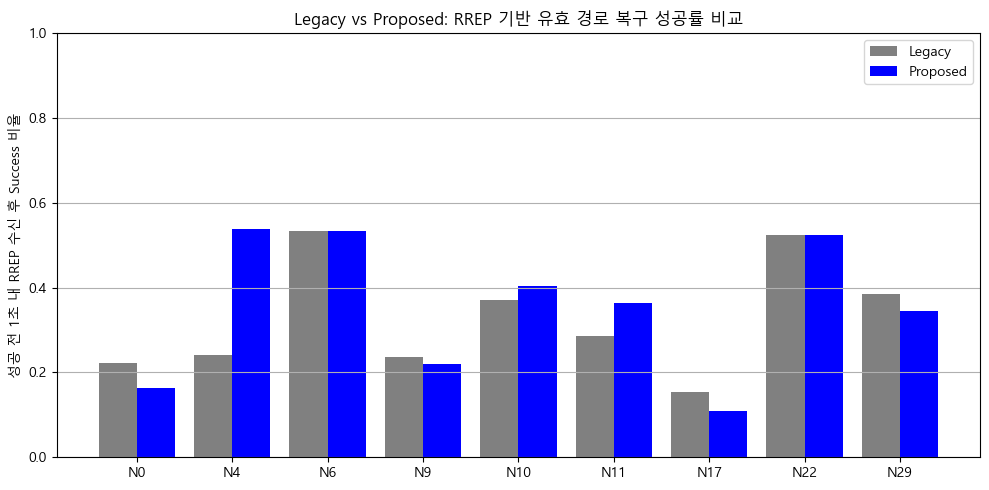

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)
delta = 0.1

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(round(t, 3))
            except: continue
    return times

def compute_rrep_to_success_ratio(base_dir):
    ratio_data = []
    for node in nodes:
        path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        matched = 0
        for r in rrep_times:
            if any(0 < s - r <= delta for s in success_times):
                matched += 1

        ratio = matched / len(rrep_times) if rrep_times else 0
        ratio_data.append({"Node": node, "RREP_Count": len(rrep_times), "Matched_Success": matched, "Ratio": round(ratio, 3)})
    return pd.DataFrame(ratio_data)

proposed_df = compute_rrep_to_success_ratio(os.path.join(base_path, "P", density, speed))
legacy_df = compute_rrep_to_success_ratio(os.path.join(base_path, "L", density, speed))

merged = proposed_df[["Node", "Ratio"]].rename(columns={"Ratio": "Proposed_Ratio"})
merged["Legacy_Ratio"] = legacy_df["Ratio"]

x = range(len(merged))
labels = merged["Node"]

plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], merged["Legacy_Ratio"], width=0.4, label="Legacy", color="gray")
plt.bar([i + 0.2 for i in x], merged["Proposed_Ratio"], width=0.4, label="Proposed", color="blue")
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("성공 전 1초 내 RREP 수신 후 Success 비율")
plt.title("Legacy vs Proposed: RREP 기반 유효 경로 복구 성공률 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


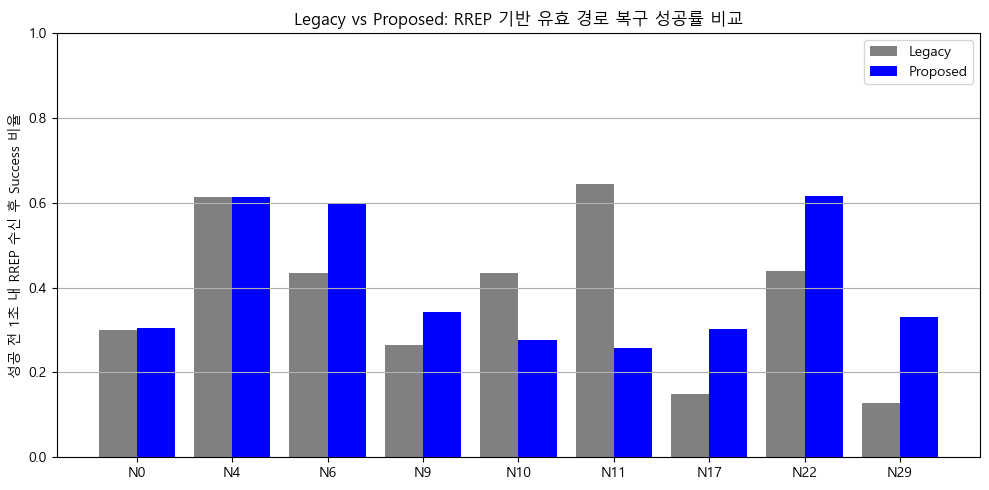

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S20"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)
delta = 0.1

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(round(t, 3))
            except: continue
    return times

def compute_rrep_to_success_ratio(base_dir):
    ratio_data = []
    for node in nodes:
        path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        matched = 0
        for r in rrep_times:
            if any(0 < s - r <= delta for s in success_times):
                matched += 1

        ratio = matched / len(rrep_times) if rrep_times else 0
        ratio_data.append({"Node": node, "RREP_Count": len(rrep_times), "Matched_Success": matched, "Ratio": round(ratio, 3)})
    return pd.DataFrame(ratio_data)

proposed_df = compute_rrep_to_success_ratio(os.path.join(base_path, "P", density, speed))
legacy_df = compute_rrep_to_success_ratio(os.path.join(base_path, "L", density, speed))

merged = proposed_df[["Node", "Ratio"]].rename(columns={"Ratio": "Proposed_Ratio"})
merged["Legacy_Ratio"] = legacy_df["Ratio"]

x = range(len(merged))
labels = merged["Node"]

plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], merged["Legacy_Ratio"], width=0.4, label="Legacy", color="gray")
plt.bar([i + 0.2 for i in x], merged["Proposed_Ratio"], width=0.4, label="Proposed", color="blue")
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("성공 전 1초 내 RREP 수신 후 Success 비율")
plt.title("Legacy vs Proposed: RREP 기반 유효 경로 복구 성공률 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


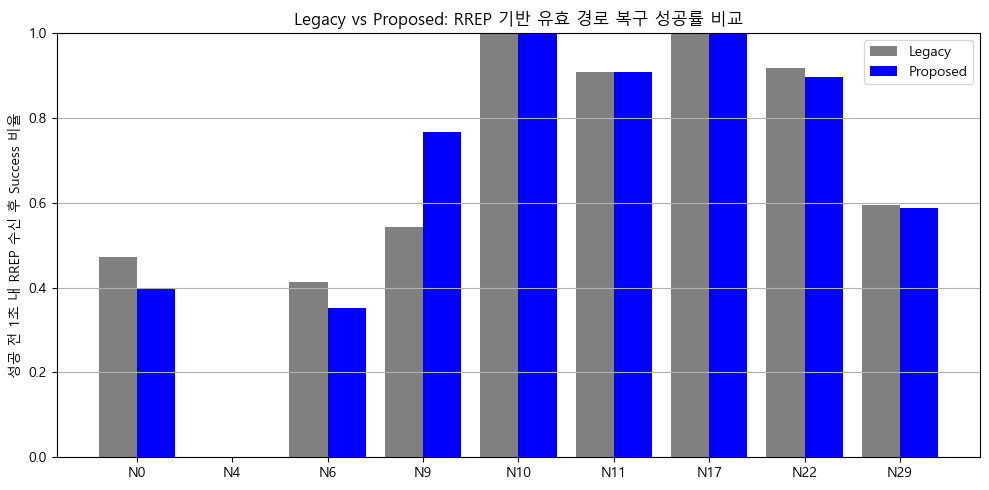

In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S10"
nodes = ["N0","N4", "N6", "N9", "N10", "N11", "N17", "N22", "N29"]
time_range = (30.0, 99.0)
delta = 1

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(round(t, 3))
            except: continue
    return times

def compute_rrep_to_success_ratio(base_dir):
    ratio_data = []
    for node in nodes:
        path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        matched = 0
        for r in rrep_times:
            if any(0 < s - r <= delta for s in success_times):
                matched += 1

        ratio = matched / len(rrep_times) if rrep_times else 0
        ratio_data.append({"Node": node, "RREP_Count": len(rrep_times), "Matched_Success": matched, "Ratio": round(ratio, 3)})
    return pd.DataFrame(ratio_data)

proposed_df = compute_rrep_to_success_ratio(os.path.join(base_path, "P", density, speed))
legacy_df = compute_rrep_to_success_ratio(os.path.join(base_path, "L", density, speed))

merged = proposed_df[["Node", "Ratio"]].rename(columns={"Ratio": "Proposed_Ratio"})
merged["Legacy_Ratio"] = legacy_df["Ratio"]

x = range(len(merged))
labels = merged["Node"]

plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], merged["Legacy_Ratio"], width=0.4, label="Legacy", color="gray")
plt.bar([i + 0.2 for i in x], merged["Proposed_Ratio"], width=0.4, label="Proposed", color="blue")
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("성공 전 1초 내 RREP 수신 후 Success 비율")
plt.title("Legacy vs Proposed: RREP 기반 유효 경로 복구 성공률 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


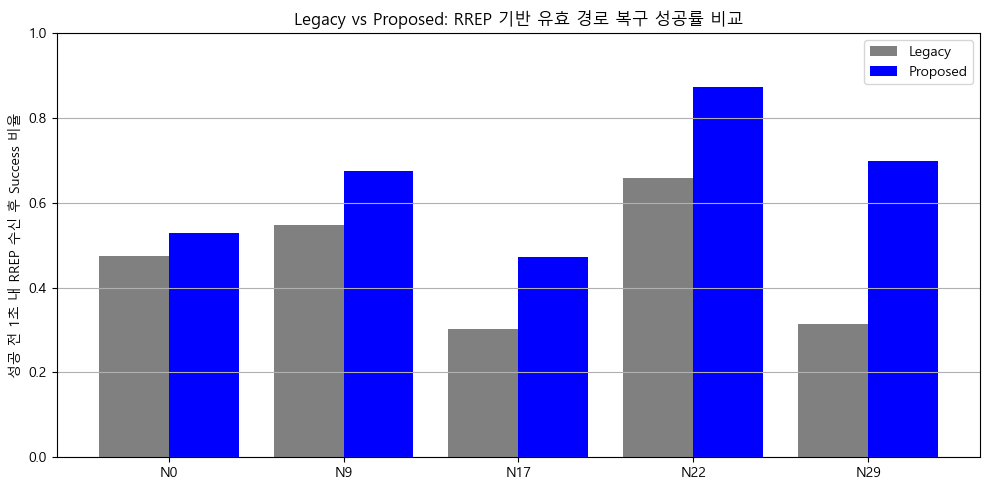

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02"
density = "D400"
speed = "S20"
nodes = ["N0", "N9", "N17", "N22", "N29"]
time_range = (30.0, 99.0)
delta = 1.0

def extract_event_times(filepath, sep=":", col=0):
    times = []
    if not os.path.isfile(filepath): return times
    with open(filepath) as f:
        for line in f:
            try:
                t = float(line.strip().split(sep)[col])
                if time_range[0] <= t <= time_range[1]:
                    times.append(round(t, 3))
            except: continue
    return times

def compute_rrep_to_success_ratio(base_dir):
    ratio_data = []
    for node in nodes:
        path = os.path.join(base_dir, node)
        success_times = extract_event_times(os.path.join(path, "success_app.txt"), sep=":", col=0)
        rrep_times = []

        rec_file = os.path.join(path, "recovery_log.csv")
        if os.path.isfile(rec_file):
            with open(rec_file) as f:
                for line in f:
                    parts = line.strip().split(",")
                    try:
                        t = float(parts[0])
                        event = parts[-1]
                        if time_range[0] <= t <= time_range[1] and event == "RREP_RECV":
                            rrep_times.append(t)
                    except: continue

        matched = 0
        for r in rrep_times:
            if any(0 < s - r <= delta for s in success_times):
                matched += 1

        ratio = matched / len(rrep_times) if rrep_times else 0
        ratio_data.append({"Node": node, "RREP_Count": len(rrep_times), "Matched_Success": matched, "Ratio": round(ratio, 3)})
    return pd.DataFrame(ratio_data)

proposed_df = compute_rrep_to_success_ratio(os.path.join(base_path, "P", density, speed))
legacy_df = compute_rrep_to_success_ratio(os.path.join(base_path, "L", density, speed))

merged = proposed_df[["Node", "Ratio"]].rename(columns={"Ratio": "Proposed_Ratio"})
merged["Legacy_Ratio"] = legacy_df["Ratio"]

x = range(len(merged))
labels = merged["Node"]

plt.figure(figsize=(10, 5))
plt.bar([i - 0.2 for i in x], merged["Legacy_Ratio"], width=0.4, label="Legacy", color="gray")
plt.bar([i + 0.2 for i in x], merged["Proposed_Ratio"], width=0.4, label="Proposed", color="blue")
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.ylabel("성공 전 1초 내 RREP 수신 후 Success 비율")
plt.title("Legacy vs Proposed: RREP 기반 유효 경로 복구 성공률 비교")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
